<a href="https://colab.research.google.com/github/TyronSamaroo/Visual_Analytics/blob/main/Cars_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from urllib.request import urlretrieve
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
name = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names"

In [3]:
urlretrieve(data, 'cars.csv')
urlretrieve(name, 'name.name')


('name.name', <http.client.HTTPMessage at 0x7f2faa6917d0>)

In [4]:
raw = pd.read_csv('cars.csv')

In [5]:
raw.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [6]:
col_names = "make,fuel-type,body-style,curb-weight,num-of-cylinders,engine-size,horsepower,city-mpg,highway-mpg,price".split(',')

In [7]:
select_columns = [2,3,6,13,15,16,21,23,24,25]

In [8]:
df = pd.read_csv('cars.csv',usecols=select_columns, names=col_names)

In [9]:
df.head()

,make,fuel-type,body-style,curb-weight,num-of-cylinders,engine-size,horsepower,city-mpg,highway-mpg,price
0,alfa-romero,gas,convertible,2548,four,130,111,21,27,13495
1,alfa-romero,gas,convertible,2548,four,130,111,21,27,16500
2,alfa-romero,gas,hatchback,2823,six,152,154,19,26,16500
3,audi,gas,sedan,2337,four,109,102,24,30,13950
4,audi,gas,sedan,2824,five,136,115,18,22,17450


In [10]:
df.isna().any()

make                False
fuel-type           False
body-style          False
curb-weight         False
num-of-cylinders    False
engine-size         False
horsepower          False
city-mpg            False
highway-mpg         False
price               False
dtype: bool

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   make              205 non-null    object
 1   fuel-type         205 non-null    object
 2   body-style        205 non-null    object
 3   curb-weight       205 non-null    int64 
 4   num-of-cylinders  205 non-null    object
 5   engine-size       205 non-null    int64 
 6   horsepower        205 non-null    object
 7   city-mpg          205 non-null    int64 
 8   highway-mpg       205 non-null    int64 
 9   price             205 non-null    object
dtypes: int64(4), object(6)
memory usage: 16.1+ KB


In [12]:
res =  pd.DataFrame()
for col in col_names:
    res = pd.concat([res ,df.loc[df[col]== '?', :]])

In [13]:
res

,make,fuel-type,body-style,curb-weight,num-of-cylinders,engine-size,horsepower,city-mpg,highway-mpg,price
130,renault,gas,wagon,2579,four,132,?,23,31,9295
131,renault,gas,hatchback,2460,four,132,?,23,31,9895
9,audi,gas,hatchback,3053,five,131,160,16,22,?
44,isuzu,gas,sedan,1874,four,90,70,38,43,?
45,isuzu,gas,sedan,1909,four,90,70,38,43,?
129,porsche,gas,hatchback,3366,eight,203,288,17,28,?


In [14]:
df_clean = df.drop(index=res.index)

In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   make              199 non-null    object
 1   fuel-type         199 non-null    object
 2   body-style        199 non-null    object
 3   curb-weight       199 non-null    int64 
 4   num-of-cylinders  199 non-null    object
 5   engine-size       199 non-null    int64 
 6   horsepower        199 non-null    object
 7   city-mpg          199 non-null    int64 
 8   highway-mpg       199 non-null    int64 
 9   price             199 non-null    object
dtypes: int64(4), object(6)
memory usage: 17.1+ KB


In [16]:
df_clean_index_reset = df_clean.reset_index(drop=True)

In [17]:
df_clean_index_reset

,make,fuel-type,body-style,curb-weight,num-of-cylinders,engine-size,horsepower,city-mpg,highway-mpg,price
0,alfa-romero,gas,convertible,2548,four,130,111,21,27,13495
1,alfa-romero,gas,convertible,2548,four,130,111,21,27,16500
2,alfa-romero,gas,hatchback,2823,six,152,154,19,26,16500
3,audi,gas,sedan,2337,four,109,102,24,30,13950
4,audi,gas,sedan,2824,five,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...
194,volvo,gas,sedan,2952,four,141,114,23,28,16845
195,volvo,gas,sedan,3049,four,141,160,19,25,19045
196,volvo,gas,sedan,3012,six,173,134,18,23,21485
197,volvo,diesel,sedan,3217,six,145,106,26,27,22470


In [18]:
cars_data = df_clean_index_reset

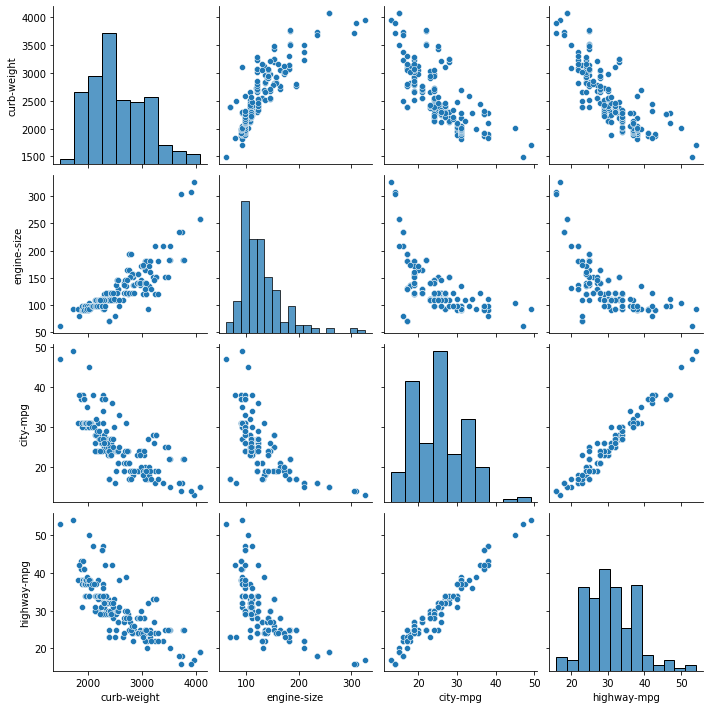

In [19]:
sns.pairplot(cars_data)

In [20]:
cars_data.to_csv("Tyron_Cars_Data_Cleaned.csv",index = False)

# Quantative vs. Quantitative 

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
  "description": "A simple bar chart with embedded data.",
"data": {"url": "https://raw.githubusercontent.com/TyronSamaroo/Visual_Analytics/main/Tyron_Cars_Data_Cleaned.csv"},
  "mark": "point",
  "encoding": {
    "x": {"field": "horsepower", "type": "quantitative", "axis": {"labelAngle": 40}},
    "y": {"field": "price", "type": "quantitative"}
  }
  
}
```










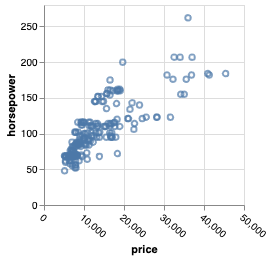

## Questions 

**Why**

**What**

**How** 



```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
  "description": "A simple bar chart with embedded data.",
"data": {"url": "https://raw.githubusercontent.com/TyronSamaroo/Visual_Analytics/main/Tyron_Cars_Data_Cleaned.csv"},
  "mark": "point",
  "encoding": {
    "x": {"field": "horsepower", "type": "quantitative", "axis": {"labelAngle": 40}},
    "y": {"field": "price", "type": "quantitative"},
    "color": {"field": "body-style"}
  }

}

```



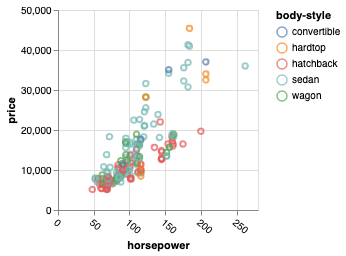

## Questions 

**Why**

**What**

**How** 



```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
  "description": "A simple bar chart with embedded data.",
"data": {"url": "https://raw.githubusercontent.com/TyronSamaroo/Visual_Analytics/main/Tyron_Cars_Data_Cleaned.csv"},
  "mark": "bar",
  "encoding": {
    "x": {"bin": true, "field": "price", "type": "quantitative", "axis": {"labelAngle": 0}},
   "y": {"aggregate": "count"}
  }
  
}


```



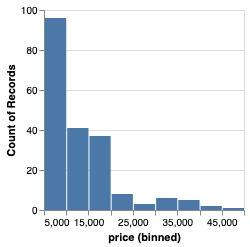

#Quantitative vs. Categorical 



```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
  "description": "A simple bar chart with embedded data.",
"data": {"url": "https://raw.githubusercontent.com/TyronSamaroo/Visual_Analytics/main/Tyron_Cars_Data_Cleaned.csv"},
  "mark": "point",
  "encoding": {
    "x": {"field": "horsepower", "type": "quantitative", "axis": {"labelAngle": 40}},
    "y": {"field": "num-of-cylinders", "type": "ordinal"}
  }
  
}

```



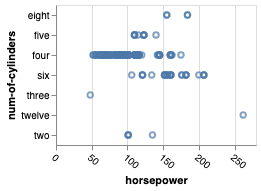

## Questions 

**Why**

**What**

**How** 

#Categorical vs Categorical 



```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
  "description": "A simple bar chart with embedded data.",
"data": {"url": "https://raw.githubusercontent.com/TyronSamaroo/Visual_Analytics/main/Tyron_Cars_Data_Cleaned.csv"},
  "mark": "point",
  "encoding": {
    "x": {"field": "body-style", "type": "ordinal", "axis": {"labelAngle": 40}},
    "y": {"field": "num-of-cylinders", "type": "ordinal"}
  }
  
}

```



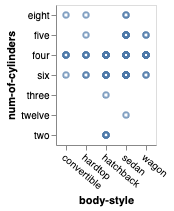

##Questions
Why

What

How